In [246]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [247]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [248]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [249]:
del data_df['Name']
del data_df['Ticket']
del data_df['PassengerId']
del data_df['Survived']
del data_df['Fare']
del data_df['Cabin']
x_data = data_df.copy()
x_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S


<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [250]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


In [251]:
# # 기본적인 결측치 채우는 방법
# mean_age = x_data['Age'].median(skipna=True)
# x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

In [252]:
x_data.isnull().sum() # x의 빈 값

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [253]:
y_data.isnull().sum() # y의 빈 값

Survived    0
dtype: int64

In [254]:
i = [] # 성별이 들어갈 행렬
sex = 0

for sex in x_data['Sex']:
    if sex == 'male':
        i.append(1)
    elif sex == 'female':
        i.append(0)
    else:
        i.append(np.nan)
        
x_data['Sex'] = i
x_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,S
1,1,0,38.0,1,0,C
2,3,0,26.0,0,0,S
3,1,0,35.0,1,0,S
4,3,1,35.0,0,0,S
5,3,1,NaN,0,0,Q
6,1,1,54.0,0,0,S
7,3,1,2.0,3,1,S
8,3,0,27.0,0,2,S
9,2,0,14.0,1,0,C


In [255]:
mean_age = x_data['Age'].mean() # 나이의 빈 값을 평균값으로 채움
x_data['Age'].fillna(mean_age, inplace = True)
x_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,S
1,1,0,38.000000,1,0,C
2,3,0,26.000000,0,0,S
3,1,0,35.000000,1,0,S
4,3,1,35.000000,0,0,S
5,3,1,29.699118,0,0,Q
6,1,1,54.000000,0,0,S
7,3,1,2.000000,3,1,S
8,3,0,27.000000,0,2,S
9,2,0,14.000000,1,0,C


In [256]:
x_data.loc[x_data['Age']<10,'Age_band']= '0'
x_data.loc[(x_data['Age']>=10)&(x_data['Age']<20),'Age_band']='1'
x_data.loc[(x_data['Age']>=20)&(x_data['Age']<30),'Age_band']='2'
x_data.loc[(x_data['Age']>=30)&(x_data['Age']<40),'Age_band']='3'
x_data.loc[(x_data['Age']>=40)&(x_data['Age']<50),'Age_band']='4'
x_data.loc[(x_data['Age']>=50)&(x_data['Age']<60),'Age_band']='5'
x_data.loc[(x_data['Age']>=60)&(x_data['Age']<70),'Age_band']='6'
x_data.loc[x_data['Age']>=70,'Age_band']= '7'

In [257]:
x_data['Age'] = x_data['Age_band'] # 나이를 10살 기준으로 나누고 Age열을 교체함

In [258]:
del x_data['Age_band'] # 필요없는 열 삭제

In [259]:
x_data['Embarked'].fillna('S', inplace = True) # Embarked에서 2개의 빈 값을 S로 채움

In [260]:
j = [] # 선착장이 들어갈 행렬
Emb = 0

for Emb in x_data['Embarked']:
    if Emb == 'C':
        j.append(0)
    elif Emb == 'Q':
        j.append(1)
    else:
        j.append(2)
        
x_data['Embarked'] = j

In [261]:
x_data['survied'] = y_data # 생존여부 열 추가

In [262]:
# bar_chart라는 함수에 원하는 열을 입력하면 생존여부 출력
def bar_chart(feature):
    survived = x_data[x_data['survied']==1][feature].value_counts()
    dead = x_data[x_data['survied']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived', 'dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

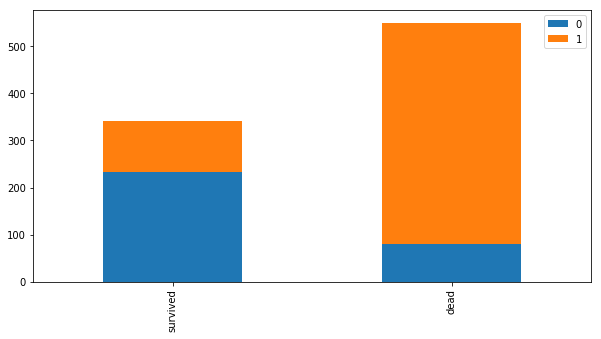

In [263]:
bar_chart('Sex')

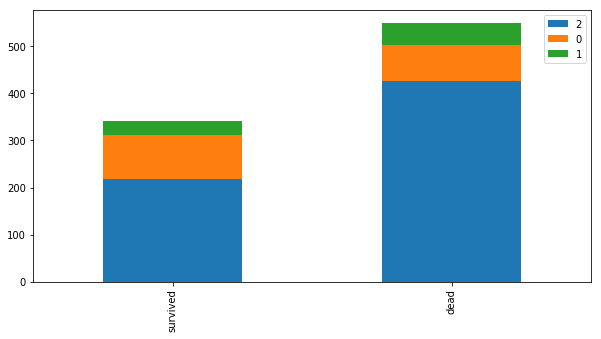

In [264]:
bar_chart('Embarked')

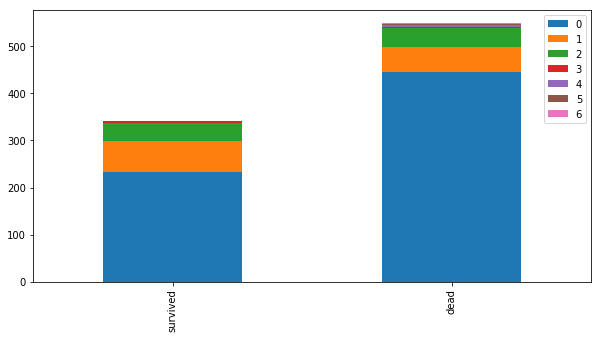

In [265]:
bar_chart('Parch')

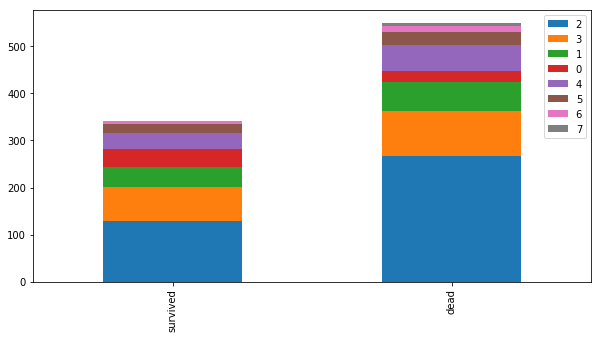

In [266]:
bar_chart('Age')

In [267]:
x_data['son'] = 0
x_data['Age'] = x_data['Age'].astype('int')

son_with_parents = x_data[(x_data['Age'] < 2) & (x_data['Parch'] > 0)]

for idx in son_with_parents.index:
    x_data.at[idx, 'son'] = 1

In [268]:
x_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,survied,son
0,3,1,2,1,0,2,0,0
1,1,0,3,1,0,0,1,0
2,3,0,2,0,0,2,1,0
3,1,0,3,1,0,2,1,0
4,3,1,3,0,0,2,0,0
5,3,1,2,0,0,1,0,0
6,1,1,5,0,0,2,0,0
7,3,1,0,3,1,2,0,1
8,3,0,2,0,2,2,1,0
9,2,0,1,1,0,0,1,0


In [269]:
del x_data['survied'] # 생존여부 지움

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [270]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_data, y_data, test_size=0.3, random_state=0)

In [271]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 7)
(268, 7)
(623, 1)
(268, 1)


<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

In [272]:
from sklearn import linear_model
model = linear_model.LogisticRegression() # 로지스틱회귀
model2 = neighbors.KNeighborsClassifier(2) #KNN

<br>

## 4. Train the model

In [273]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [274]:
pred_test = model.predict_proba(x_test)
pred_test

array([[0.83036097, 0.16963903],
       [0.8749797 , 0.1250203 ],
       [0.87759456, 0.12240544],
       [0.10659748, 0.89340252],
       [0.35725622, 0.64274378],
       [0.58574498, 0.41425502],
       [0.12472035, 0.87527965],
       [0.15135354, 0.84864646],
       [0.59363233, 0.40636767],
       [0.28561208, 0.71438792],
       [0.91180377, 0.08819623],
       [0.24070679, 0.75929321],
       [0.85407872, 0.14592128],
       [0.07230429, 0.92769571],
       [0.07473626, 0.92526374],
       [0.33977249, 0.66022751],
       [0.8749797 , 0.1250203 ],
       [0.57042836, 0.42957164],
       [0.88602622, 0.11397378],
       [0.55737949, 0.44262051],
       [0.73904485, 0.26095515],
       [0.1035325 , 0.8964675 ],
       [0.85407872, 0.14592128],
       [0.58574498, 0.41425502],
       [0.36371993, 0.63628007],
       [0.14790587, 0.85209413],
       [0.88602622, 0.11397378],
       [0.36371993, 0.63628007],
       [0.23251463, 0.76748537],
       [0.35852967, 0.64147033],
       [0.

In [275]:
from sklearn.metrics import accuracy_score # accuracy

# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

Accuracy:  0.7985074626865671


In [276]:
from sklearn import neighbors, datasets

knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

83.79

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

In [277]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

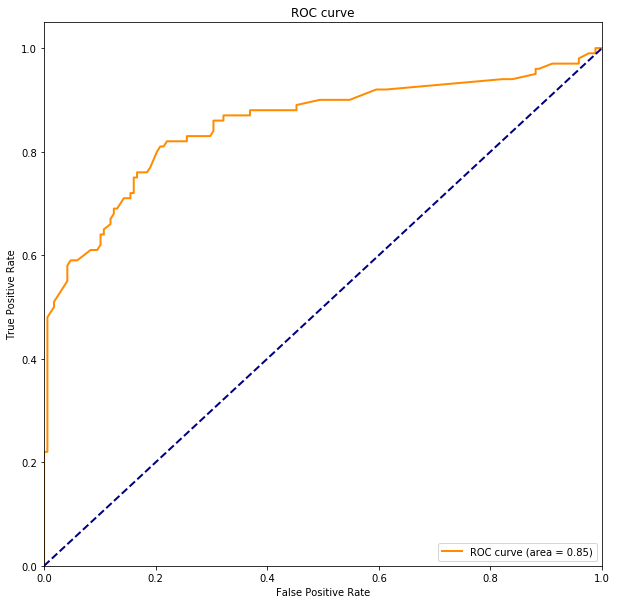

In [278]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()